Tensor Mesh

In [18]:
from discretize import TensorMesh
from discretize import CylindricalMesh
from discretize import TreeMesh
from discretize import CurvilinearMesh
from discretize.utils import mkvc
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='x1', ylabel='x2'>

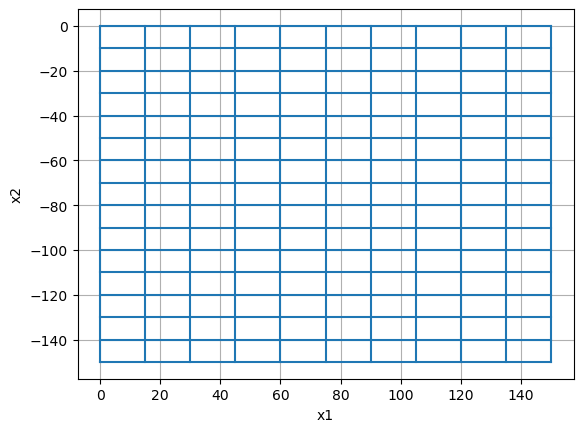

In [19]:
###############################################
# Basic Example
# -------------
#
# The easiest way to define a tensor mesh is to define the cell widths in
# x, y and z as 1D numpy arrays. And to provide the position of the bottom
# southwest corner of the mesh. We demonstrate this here for a 2D mesh (thus
# we do not need to consider the z-dimension).
#

ncx = 10  # number of core mesh cells in x
ncy = 15  # number of core mesh cells in y
dx = 15  # base cell width x
dy = 10  # base cell width y
hx = dx * np.ones(ncx)
hy = dy * np.ones(ncy)

x0 = 0
y0 = -150

mesh = TensorMesh([hx, hy], x0=[x0, y0])

mesh.plot_grid()

[(15, 4, -1.25), (15, 10), (15, 4, 1.25)]


Text(0.5, 1.0, 'Tensor Mesh')

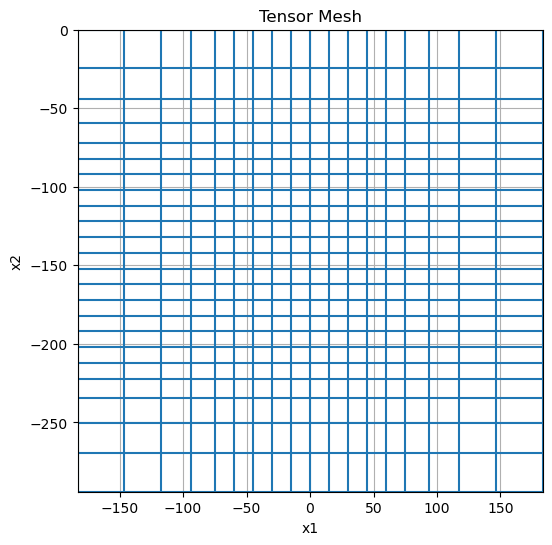

In [20]:
###############################################
# Padding Cells and Plotting
# --------------------------
#
# For practical purposes, the user may want to define a region where the cell
# widths are increasing/decreasing in size. For example, padding is often used
# to define a large domain while reducing the total number of mesh cells.
# Here we demonstrate how to create tensor meshes that have padding cells.
#

ncx = 10  # number of core mesh cells in x
ncy = 15  # number of core mesh cells in y
dx = 15  # base cell width x
dy = 10  # base cell width y
npad_x = 4  # number of padding cells in x
npad_y = 4  # number of padding cells in y
exp_x = 1.25  # expansion rate of padding cells in x
exp_y = 1.25  # expansion rate of padding cells in y

# Use a list of tuples to define cell widths in each direction. Each tuple
# contains the cell width, number of cells and the expansion factor. A
# negative sign is used to indicate an interval where cells widths go
# from largest to smallest.
hx = [(dx, npad_x, -exp_x), (dx, ncx), (dx, npad_x, exp_x)]
hy = [(dy, npad_y, -exp_y), (dy, ncy), (dy, npad_y, exp_y)]
print(hx)
# We can use flags 'C', '0' and 'N' to shift the xyz position of the mesh
# relative to the origin
mesh = TensorMesh([hx, hy], x0="CN")

# We can apply the plot_grid method and output to a specified axes object
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
mesh.plot_grid(ax=ax)
ax.set_xbound(mesh.x0[0], mesh.x0[0] + np.sum(mesh.h[0]))
ax.set_ybound(mesh.x0[1], mesh.x0[1] + np.sum(mesh.h[1]))
ax.set_title("Tensor Mesh")

Text(0.5, 1.0, 'Cell Areas')

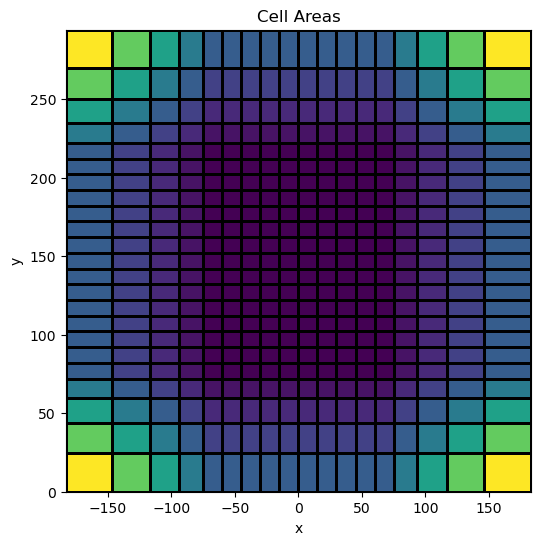

In [21]:
###############################################
# Extracting Mesh Properties
# --------------------------
#
# Once the mesh is created, you may want to extract certain properties. Here,
# we show some properties that can be extracted from 2D meshes.
#

ncx = 10  # number of core mesh cells in x
ncy = 15  # number of core mesh cells in y
dx = 15  # base cell width x
dy = 10  # base cell width y
npad_x = 4  # number of padding cells in x
npad_y = 4  # number of padding cells in y
exp_x = 1.25  # expansion rate of padding cells in x
exp_y = 1.25  # expansion rate of padding cells in y

hx = [(dx, npad_x, -exp_x), (dx, ncx), (dx, npad_x, exp_x)]
hy = [(dy, npad_y, -exp_y), (dy, ncy), (dy, npad_y, exp_y)]

mesh = TensorMesh([hx, hy], x0="C0")

# The bottom west corner
x0 = mesh.x0
# print(x0)

# The total number of cells
nC = mesh.nC
# print(nC)

# An (nC, 2) array containing the cell-center locations
cc = mesh.gridCC
# print(cc)

# A boolean array specifying which cells lie on the boundary
bInd = mesh.cell_boundary_indices

# Plot the cell areas (2D "volume")
s = mesh.cell_volumes

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
mesh.plot_image(s, grid=True, ax=ax)
ax.set_xbound(mesh.x0[0], mesh.x0[0] + np.sum(mesh.h[0]))
ax.set_ybound(mesh.x0[1], mesh.x0[1] + np.sum(mesh.h[1]))
ax.set_title("Cell Areas")

<Axes3D: xlabel='x1', ylabel='x2', zlabel='x3'>

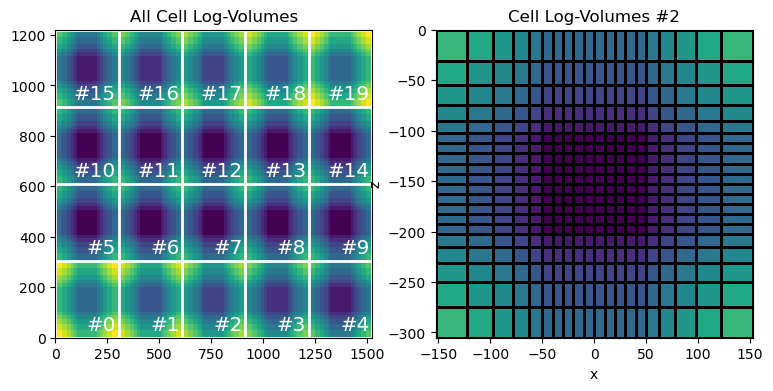

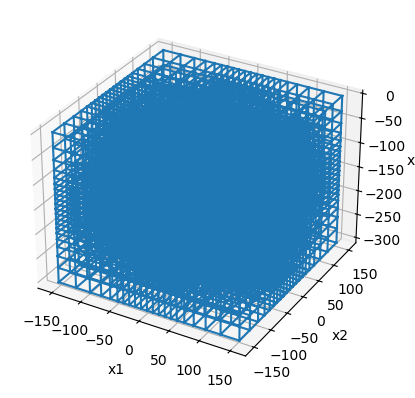

In [22]:
###############################################
# 3D Example
# ----------
#
# Here we show how the same approach can be used to create and extract
# properties from a 3D tensor mesh.
#

nc = 10  # number of core mesh cells in x, y and z
dh = 10  # base cell width in x, y and z
npad = 5  # number of padding cells
exp = 1.25  # expansion rate of padding cells

h = [(dh, npad, -exp), (dh, nc), (dh, npad, exp)]

mesh = TensorMesh([h, h, h], x0="CCN")

# The bottom southwest corner
x0 = mesh.x0

# The total number of cells
nC = mesh.nC

# An (nC, 3) array containing the cell-center locations
cc = mesh.gridCC

# A boolean array specifying which cells lie on the boundary
bInd = mesh.cell_boundary_indices

# The cell volumes
v = mesh.cell_volumes

# Plot all cells volumes or plot cell volumes for a particular horizontal slice
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

mesh.plot_image(np.log10(v), grid=True, ax=ax1)
ax1.set_title("All Cell Log-Volumes")

cplot = mesh.plot_slice(np.log10(v), grid=True, ax=ax2, normal="Y", ind=12)
cplot[0].set_clim(np.min(np.log10(v)), np.max(np.log10(v)))
ax2.set_title("Cell Log-Volumes #2")
mesh.plot_grid()

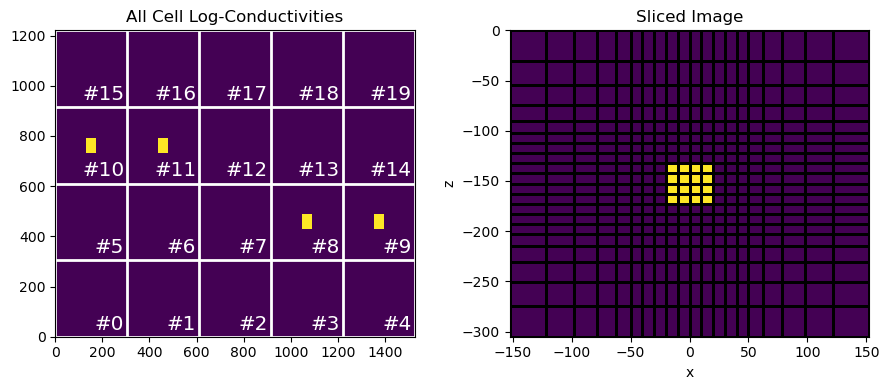

In [23]:
# Define conductivity values
sigma_surrounding = 1
sigma_object = 1000

# Get the cell centers
cc = mesh.gridCC  # Use cell_centers for getting center of cells
z_center = -sum(mesh.h[2][:npad+int(nc/2)])

# Define the block limits (centered in the model)
x_min, x_max = -20, 20  # 40 units in x direction
y_min, y_max = -30, 30  # 60 units in y direction
z_min, z_max = -20 + z_center, 20 + z_center  # 40 units in z direction

# Find the indices of the cells within the block
block_ind = (
    (cc[:, 0] >= x_min) & (cc[:, 0] <= x_max) & 
    (cc[:, 1] >= y_min) & (cc[:, 1] <= y_max) &
    (cc[:, 2] >= z_min) & (cc[:, 2] <= z_max)
)

# Initialize the model with the surrounding conductivity
model = np.log(sigma_surrounding) * np.ones(mesh.n_cells)

# Assign the conductivity value of the block
model[block_ind] = np.log(sigma_object)

# Plotting the model
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot the full model (log-conductivity values)
mesh.plot_image(model, grid=True, ax=ax1)
ax1.set_title("All Cell Log-Conductivities")

# Plot a slice through the middle of the Z direction (adjust 'ind' as needed)
cplot = mesh.plot_slice(model, grid=True, ax=ax2, normal="Y", ind=10)  # Take slice in the middle
cplot[0].set_clim(np.log(sigma_surrounding), np.log(sigma_object))
ax2.set_title("Sliced Image")
plt.tight_layout()
plt.show()

Cylindrically Synnetric Mesh

PolarAxes


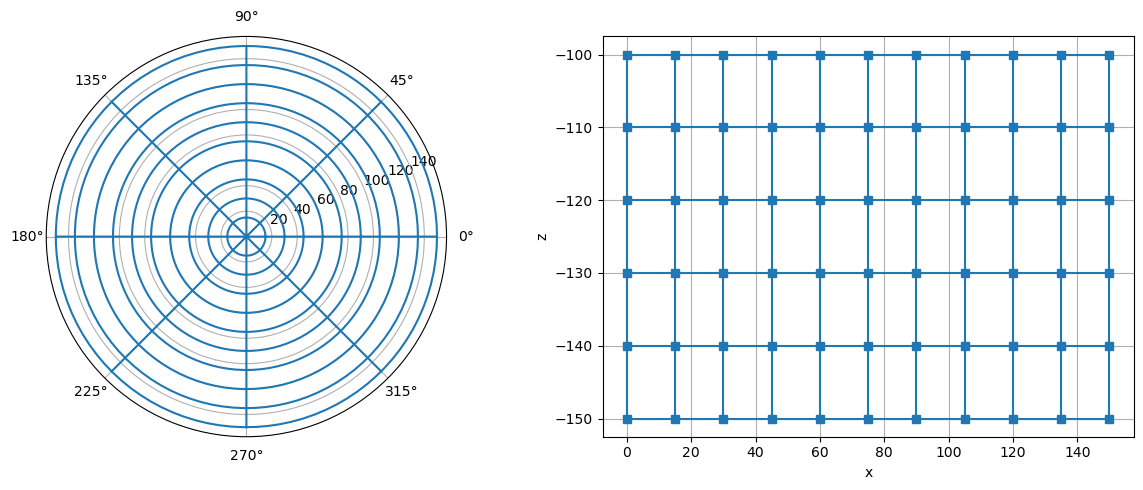

In [24]:
# Cylindrical meshes are defined in terms of *r*(radial position), *z* (vertical position) and *phi* (azimuthal position).

###############################################
# Basic Example
# -------------
#
# The easiest way to define a cylindrical mesh is to define the cell widths in
# *r*, *phi* and *z* as 1D numpy arrays. And to provide a Cartesian position
# for the bottom of the vertical axis of symmetry of the mesh. Note that
#
#    1. *phi* is in radians
#    2. The sum of values in the numpy array for *phi* cannot exceed :math:`2\pi`
#
#

ncr = 10  # number of mesh cells in r
ncp = 8  # number of mesh cells in phi
ncz = 5  # number of mesh cells in z
dr = 15  # cell width r
dz = 10  # cell width z

hr = dr * np.ones(ncr)
hp = (2 * np.pi / ncp) * np.ones(ncp)
hz = dz * np.ones(ncz)

x0 = 0.0
y0 = 0.0
z0 = -150.0

mesh = CylindricalMesh([hr, hp, hz], x0=[x0, y0, z0])

mesh.plot_grid(nodes=True)
plt.show()

PolarAxes


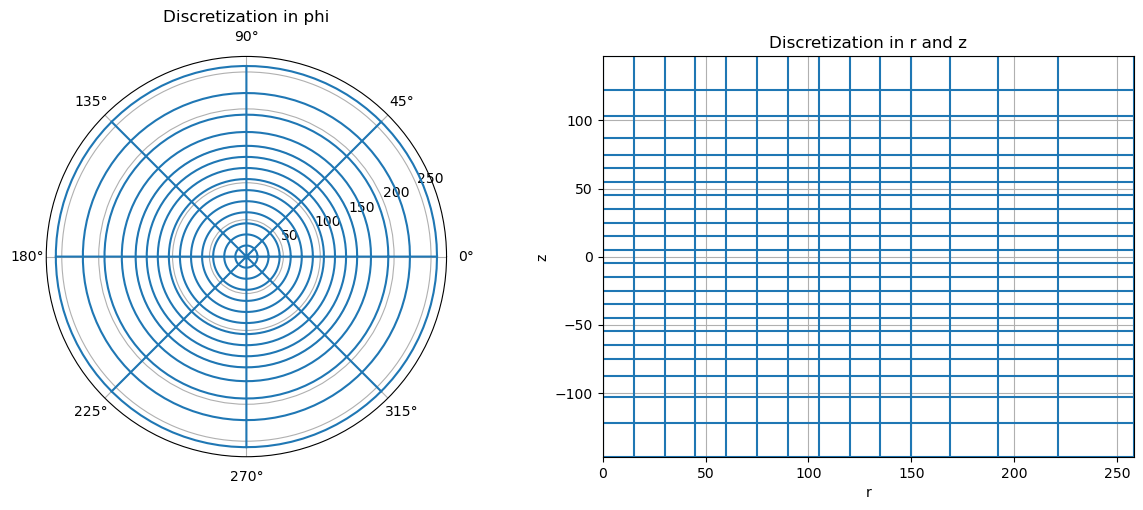

In [25]:
###############################################
# Padding Cells and Extracting Properties
# ---------------------------------------
#
# For practical purposes, the user may want to define a region where the cell
# widths are increasing/decreasing in size. For example, padding is often used
# to define a large domain while reducing the total number of mesh cells.
# Here we demonstrate how to create cylindrical meshes that have padding cells.
# We then show some properties that can be extracted from cylindrical meshes.
#

ncr = 10  # number of mesh cells in r
ncp = 8  # number of mesh cells in phi
ncz = 15  # number of mesh cells in z
dr = 15  # cell width r
dp = 2 * np.pi / ncp  # cell width phi
dz = 10  # cell width z
npad_r = 4  # number of padding cells in r
npad_z = 4  # number of padding cells in z
exp_r = 1.25  # expansion rate of padding cells in r
exp_z = 1.25  # expansion rate of padding cells in z

# Use a list of tuples to define cell widths in each direction. Each tuple
# contains the cell with, number of cells and the expansion factor (+ve/-ve).
hr = [(dr, ncr), (dr, npad_r, exp_r)]
hp = [(dp, ncp)]
hz = [(dz, npad_z, -exp_z), (dz, ncz), (dz, npad_z, exp_z)]

# We can use flags 'C', '0' and 'N' to define the xyz position of the mesh.
mesh = CylindricalMesh([hr, hp, hz], x0="00C")

# We can apply the plot_grid method and change the axis properties
ax = mesh.plot_grid()
ax[0].set_title("Discretization in phi")
ax[1].set_title("Discretization in r and z")
ax[1].set_xlabel("r")
ax[1].set_xbound(mesh.x0[0], mesh.x0[0] + np.sum(mesh.h[0]))
ax[1].set_ybound(mesh.x0[2], mesh.x0[2] + np.sum(mesh.h[2]))

# The bottom end of the vertical axis of rotational symmetry
x0 = mesh.x0

# The total number of cells
nC = mesh.nC

# An (nC, 3) array containing the cell-center locations
cc = mesh.gridCC

# The cell volumes
v = mesh.cell_volumes

Text(0.5, 1.0, 'Cell Log-Volumes')

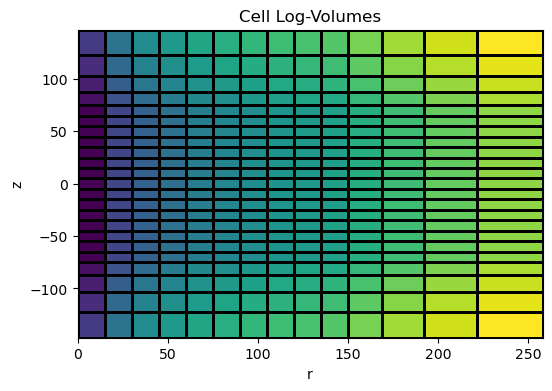

In [26]:
###############################################
# Cylindrical Mesh for Rotational Symmetry
# ----------------------------------------
#
# Cylindrical mesh are most useful when solving problems with perfect
# rotational symmetry. More precisely when:
#
#    - field components in the *phi* direction are 0
#    - fluxes in *r* and *z* are 0
#
# In this case, the size of the forward problem can be significantly reduced.
# Here we demonstrate how to create a mesh for solving differential equations
# with perfect rotational symmetry. Since the fields and fluxes are independent
# of the phi position, there will be no need to discretize along the phi
# direction.
#

ncr = 10  # number of mesh cells in r
ncz = 15  # number of mesh cells in z
dr = 15  # cell width r
dz = 10  # cell width z
npad_r = 4  # number of padding cells in r
npad_z = 4  # number of padding cells in z
exp_r = 1.25  # expansion rate of padding cells in r
exp_z = 1.25  # expansion rate of padding cells in z

hr = [(dr, ncr), (dr, npad_r, exp_r)]
hz = [(dz, npad_z, -exp_z), (dz, ncz), (dz, npad_z, exp_z)]

# A value of 1 is used to define the discretization in phi for this case.
mesh = CylindricalMesh([hr, 1, hz], x0="00C")

# The bottom end of the vertical axis of rotational symmetry
x0 = mesh.x0

# The total number of cells
nC = mesh.nC

# An (nC, 3) array containing the cell-center locations
cc = mesh.gridCC

# Plot the cell volumes.
v = mesh.cell_volumes

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
mesh.plot_image(np.log10(v), grid=True, ax=ax)
ax.set_xlabel("r")
ax.set_xbound(mesh.x0[0], mesh.x0[0] + np.sum(mesh.h[0]))
ax.set_ybound(mesh.x0[2], mesh.x0[2] + np.sum(mesh.h[2]))
ax.set_title("Cell Log-Volumes")

QuadTree and Octree Mesh

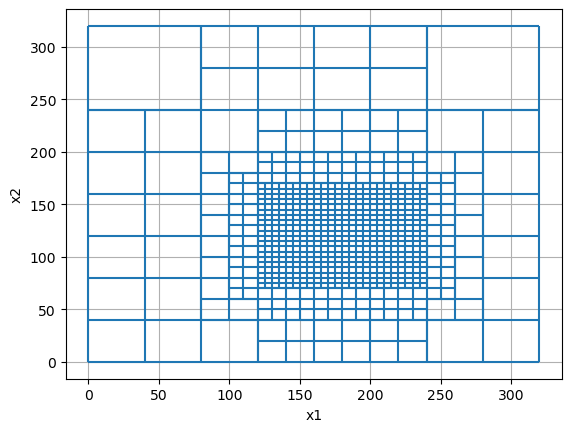

<Axes: xlabel='x1', ylabel='x2'>

In [27]:
###############################################
# Basic Example
# -------------
#
# Here we demonstrate the basic two step process for creating a 2D tree mesh
# (QuadTree mesh). The region of highest discretization if defined within a
# rectangular box. We use the keyword argument *octree_levels* to define the
# rate of cell width increase outside the box.
#

dh = 5  # minimum cell width (base mesh cell width)
nbc = 64  # number of base mesh cells in x

# Define base mesh (domain and finest discretization)
h = dh * np.ones(nbc)
mesh = TreeMesh([h, h])

# Define corner points for rectangular box
xp, yp = np.meshgrid([120.0, 240.0], [80.0, 160.0])
xy = np.c_[mkvc(xp), mkvc(yp)]  # mkvc creates vectors

# Discretize to finest cell size within rectangular box, with padding in the z direction
# at the finest and second finest levels.
padding = [[0, 2], [0, 2]]
mesh.refine_bounding_box(xy, level=-1, padding_cells_by_level=padding)

mesh.plot_grid(show_it=True)

(<matplotlib.collections.PolyCollection at 0x1fc3164a950>,)

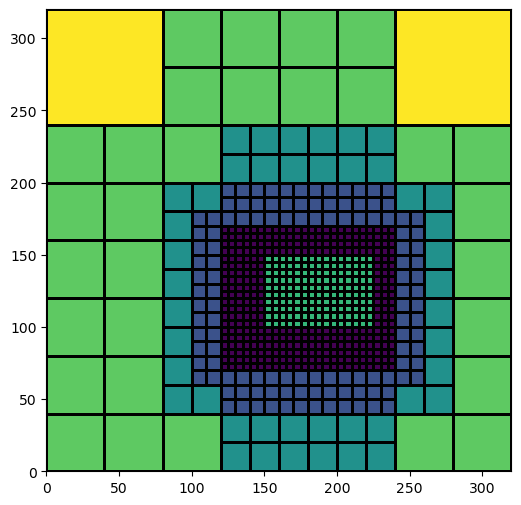

In [28]:
from SimPEG.utils import model_builder

model = mesh.cell_volumes
block_added = model_builder.add_block(mesh.gridCC, model, [150, 100], [225, 150],prop_value=1000)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
mesh.plot_image(np.log(block_added), grid=True, ax=ax)

Text(0.5, 1.0, 'QuadTree Mesh')

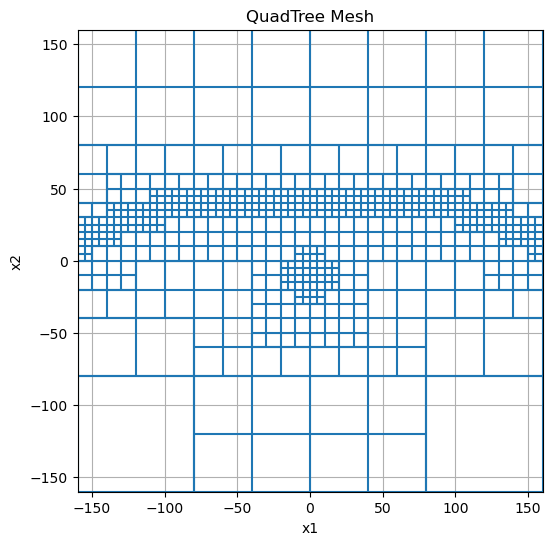

In [29]:
###############################################
# Intermediate Example and Plotting
###############################################

dx = 5  # minimum cell width (base mesh cell width) in x
dy = 5  # minimum cell width (base mesh cell width) in y

x_length = 300.0  # domain width in x
y_length = 300.0  # domain width in y

# Compute number of base mesh cells required in x and y
nbcx = 2 ** int(np.round(np.log(x_length / dx) / np.log(2.0)))
nbcy = 2 ** int(np.round(np.log(y_length / dy) / np.log(2.0)))

# Define the base mesh
hx = [(dx, nbcx)]
hy = [(dy, nbcy)]
mesh = TreeMesh([hx, hy], x0="CC")

# Refine surface topography
xx = mesh.nodes_x
yy = -3 * np.exp((xx**2) / 100**2) + 50.0
pts = np.c_[mkvc(xx), mkvc(yy)]
padding = [[0, 2], [0, 2]]
mesh.refine_surface(pts, padding_cells_by_level=padding, finalize=False)

# Refine mesh near points
xx = np.array([0.0, 10.0, 0.0, -10.0])
yy = np.array([-20.0, -10.0, 0.0, -10])
pts = np.c_[mkvc(xx), mkvc(yy)]
mesh.refine_points(pts, padding_cells_by_level=[2, 2], finalize=False)

mesh.finalize()

# We can apply the plot_grid method and output to a specified axes object
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
mesh.plot_grid(ax=ax)
ax.set_xbound(mesh.x0[0], mesh.x0[0] + np.sum(mesh.h[0]))
ax.set_ybound(mesh.x0[1], mesh.x0[1] + np.sum(mesh.h[1]))
ax.set_title("QuadTree Mesh")

Text(0.5, 1.0, 'Log of Cell Areas')

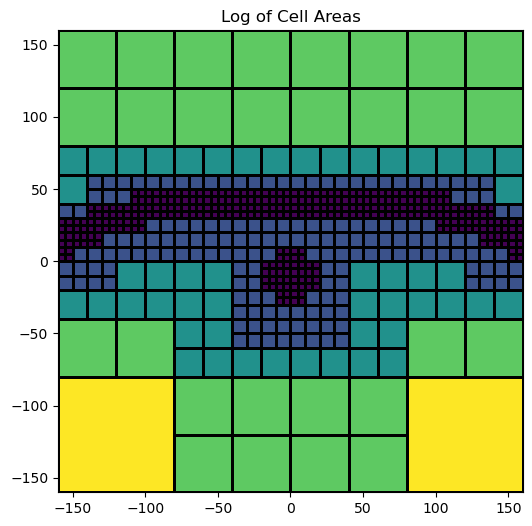

In [30]:
####################################################
# Extracting Mesh Properties
# --------------------------
#
# Once the mesh is created, you may want to extract certain properties. Here,
# we show some properties that can be extracted from a QuadTree mesh.
#

dx = 5  # minimum cell width (base mesh cell width) in x
dy = 5  # minimum cell width (base mesh cell width) in y

x_length = 300.0  # domain width in x
y_length = 300.0  # domain width in y

# Compute number of base mesh cells required in x and y
nbcx = 2 ** int(np.round(np.log(x_length / dx) / np.log(2.0)))
nbcy = 2 ** int(np.round(np.log(y_length / dy) / np.log(2.0)))

# Define the base mesh
hx = [(dx, nbcx)]
hy = [(dy, nbcy)]
mesh = TreeMesh([hx, hy], x0="CC")

# Refine surface topography
xx = mesh.nodes_x
yy = -3 * np.exp((xx**2) / 100**2) + 50.0
pts = np.c_[mkvc(xx), mkvc(yy)]
padding = [[0, 2], [0, 2]]
mesh.refine_surface(pts, padding_cells_by_level=padding, finalize=False)

# Refine near points
xx = np.array([0.0, 10.0, 0.0, -10.0])
yy = np.array([-20.0, -10.0, 0.0, -10])
pts = np.c_[mkvc(xx), mkvc(yy)]
mesh.refine_points(pts, padding_cells_by_level=[2, 2], finalize=False)

mesh.finalize()

# The bottom west corner
x0 = mesh.x0

# The total number of cells
nC = mesh.nC

# An (nC, 2) array containing the cell-center locations
cc = mesh.gridCC

# A boolean array specifying which cells lie on the boundary
bInd = mesh.cell_boundary_indices

# The cell areas (2D "volume")
s = mesh.cell_volumes

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
mesh.plot_image(np.log10(s), grid=True, ax=ax)
ax.set_xbound(mesh.x0[0], mesh.x0[0] + np.sum(mesh.h[0]))
ax.set_ybound(mesh.x0[1], mesh.x0[1] + np.sum(mesh.h[1]))
ax.set_title("Log of Cell Areas")

Text(0.5, 1.0, 'Cell Log-Volumes')

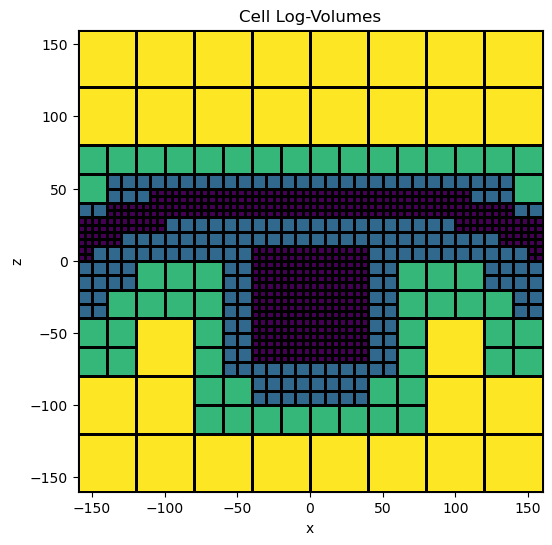

In [31]:
###############################################
# 3D Example
# ----------
#
# Here we show how the same approach can be used to create and extract
# properties from a 3D tree mesh.
#

dx = 5  # minimum cell width (base mesh cell width) in x
dy = 5  # minimum cell width (base mesh cell width) in y
dz = 5  # minimum cell width (base mesh cell width) in z

x_length = 300.0  # domain width in x
y_length = 300.0  # domain width in y
z_length = 300.0  # domain width in y

# Compute number of base mesh cells required in x and y
nbcx = 2 ** int(np.round(np.log(x_length / dx) / np.log(2.0)))
nbcy = 2 ** int(np.round(np.log(y_length / dy) / np.log(2.0)))
nbcz = 2 ** int(np.round(np.log(z_length / dz) / np.log(2.0)))

# Define the base mesh
hx = [(dx, nbcx)]
hy = [(dy, nbcy)]
hz = [(dz, nbcz)]
mesh = TreeMesh([hx, hy, hz], x0="CCC")

# Refine surface topography
[xx, yy] = np.meshgrid(mesh.nodes_x, mesh.nodes_y)
zz = -3 * np.exp((xx**2 + yy**2) / 100**2) + 50.0
pts = np.c_[mkvc(xx), mkvc(yy), mkvc(zz)]
padding = [[0, 0, 2], [0, 0, 2]]
mesh.refine_surface(pts, padding_cells_by_level=padding, finalize=False)

# Refine box
xp, yp, zp = np.meshgrid([-40.0, 40.0], [-40.0, 40.0], [-60.0, 0.0])
xyz = np.c_[mkvc(xp), mkvc(yp), mkvc(zp)]
mesh.refine_bounding_box(xyz, padding_cells_by_level=padding, finalize=False)
mesh.finalize()

# The bottom west corner
x0 = mesh.x0

# The total number of cells
nC = mesh.nC

# An (nC, 3) array containing the cell-center locations
cc = mesh.gridCC

# A boolean array specifying which cells lie on the boundary
bInd = mesh.cell_boundary_indices

# Cell volumes
v = mesh.cell_volumes

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
mesh.plot_slice(np.log10(v), normal="Y", ax=ax, ind=int(mesh.h[2].size / 2), grid=True)
ax.set_title("Cell Log-Volumes")

CurvilinearMesh

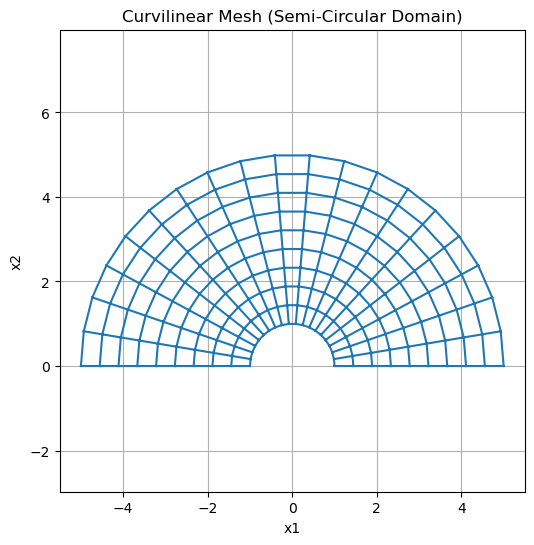

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from discretize import CurvilinearMesh

# Define the number of divisions in the radial and angular directions
n_r = 10  # Number of radial divisions
n_theta = 20  # Number of angular divisions

# Define radial and angular grid points
r = np.linspace(1, 5, n_r)  # Radial distance from 1 to 5 units
theta = np.linspace(0, np.pi, n_theta)  # Angular positions from 0 to pi (half circle)

# Create a mesh grid for polar coordinates
r_grid, theta_grid = np.meshgrid(r, theta, indexing='ij')

# Convert polar coordinates (r, theta) to Cartesian coordinates (x, y)
x = r_grid * np.cos(theta_grid)  # X-coordinates
y = r_grid * np.sin(theta_grid)  # Y-coordinates

# CurvilinearMesh expects the node coordinates for each cell in separate lists:
# Pass the x and y coordinates as two separate elements
grid = [x, y]

# Create the CurvilinearMesh
mesh = CurvilinearMesh(grid, x0="CC")

# Plot the mesh grid
fig, ax = plt.subplots(figsize=(6, 6))
mesh.plot_grid(ax=ax)
ax.set_title("Curvilinear Mesh (Semi-Circular Domain)")
plt.axis('equal')
plt.show()

[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]


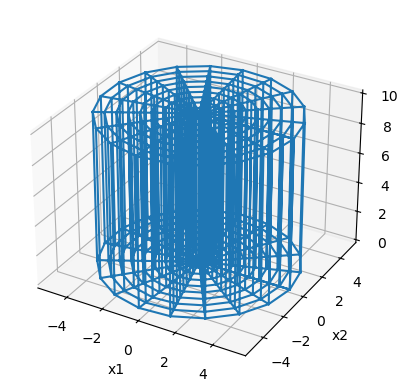

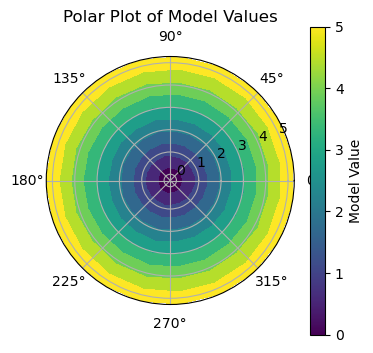

In [154]:
# Define the number of divisions in radial and azimuthal directions
n_r = 10  # Number of radial divisions
n_theta = 20  # Number of azimuthal divisions
n_z = 2  # Number of vertical divisions (height)

r = np.linspace(0, 5, n_r)
theta = np.linspace(0, 2 * np.pi, n_theta)
z = np.linspace(0, 10, n_z)

# Create a mesh grid for polar coordinates
r_grid, theta_grid, z_grid = np.meshgrid(r, theta, z, indexing='ij')

# Convert polar coordinates (r, theta) to Cartesian coordinates (x, y)
x = r_grid * np.cos(theta_grid)
y = r_grid * np.sin(theta_grid)
z = z_grid

# Prepare grid for CurvilinearMesh
grid = [x, y, z]

# Create the CurvilinearMesh
mesh = CurvilinearMesh(grid, x0='CCC')
mesh.plot_grid()

z_ind = 0
model = r_grid[:,:,z_ind]  # This could represent cell values based on radius

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(4, 4))
c = ax.pcolormesh(theta_grid[:,:,z_ind], r_grid[:,:,z_ind], model, shading='auto', cmap='viridis')

fig.colorbar(c, ax=ax, label="Model Value")
ax.set_title("Polar Plot of Model Values")
plt.show()

C:\Users\sabri\AppData\Local\Temp\ipykernel_14672\2566607042.py:56: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = ax1.pcolormesh(X[:, :, z_index], Y[:, :, z_index], model_slice[:, :, z_index], shading='auto', cmap='viridis')


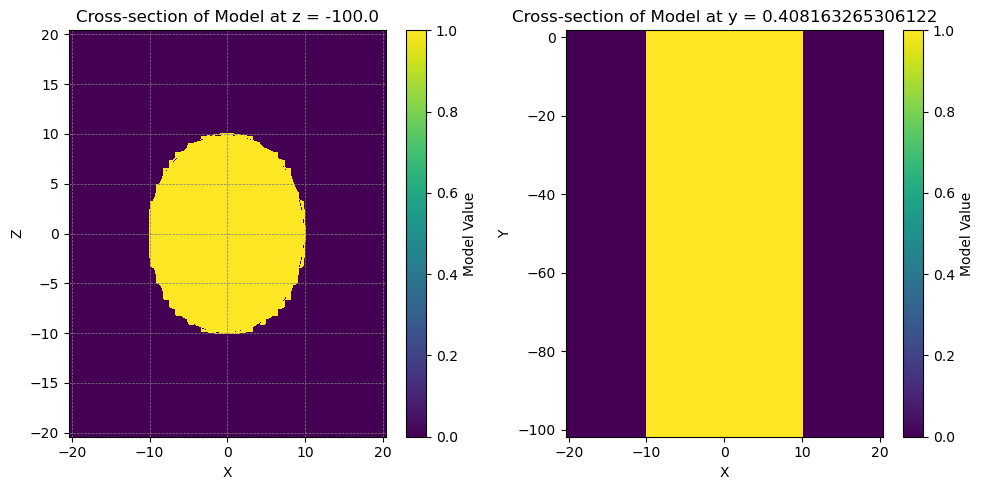

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from discretize import CurvilinearMesh

# Parameters
nx, ny = 50, 50      # Number of cells in x and y directions for the rectangular grid
cylinder_radius = 10  # Radius of the cylindrical region
box_extent = 20       # Half-width of the rectangular box in x and y directions
depth = 100           # Height of the mesh in z direction
nz = 30               # Number of cells in the z direction

# Create x and y coordinates for the rectangular box
x = np.linspace(-box_extent, box_extent, nx)
y = np.linspace(-box_extent, box_extent, ny)
z = np.linspace(-depth, 0, nz)

# Generate meshgrid for rectangular box in the x-y plane
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Create the cylindrical region in the middle by adjusting the coordinates near the center
for i in range(nx):
    for j in range(ny):
        # Calculate the distance from the center
        r = np.sqrt(X[i, j, 0]**2 + Y[i, j, 0]**2)
        
        # If within the cylinder radius, adjust points to form a circular cross-section
        if r < cylinder_radius:
            scale_factor = cylinder_radius / r if r != 0 else 1
            X[i, j, :] = X[i, j, :] * scale_factor
            Y[i, j, :] = Y[i, j, :] * scale_factor

# Prepare the grid for CurvilinearMesh
grid = [X, Y, Z]

# Create the CurvilinearMesh
mesh = CurvilinearMesh(grid, x0='CCN')
# mesh.plot_grid()
# Initialize the model array (e.g., zeros outside the cylinder, ones inside)
model = np.zeros((nx, ny, nz))

# Set the cylindrical region in the middle of the model array
for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            # Calculate radial distance from the center for each cell
            r = np.sqrt(X[i, j, k]**2 + Y[i, j, k]**2)
            if r <= cylinder_radius:
                model[i, j, k] = 1  # Set the cylindrical region to 1

model_slice = model.reshape((nx, ny, nz))  # Reshape and slice

# Plot the model slice
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

z_index = 0
c = ax1.pcolormesh(X[:, :, z_index], Y[:, :, z_index], model_slice[:, :, z_index], shading='auto', cmap='viridis')
# plt.axis("equal")
#Add color bar and labels
plt.colorbar(c, ax=ax1, label="Model Value")
ax1.set_title(f"Cross-section of Model at z = {z[z_index]}")
ax1.set_xlabel("X")
ax1.set_ylabel("Z")

y_index = int(ny/2)
c = ax2.pcolormesh(X[:, y_index, :], Z[:, y_index, :], model_slice[:, y_index, :], shading='auto', cmap='viridis')
# plt.axis("equal")
plt.colorbar(c, ax=ax2, label="Model Value")
ax2.set_title(f"Cross-section of Model at y = {y[y_index]}")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax1.grid(visible=True, color="gray", linestyle="--", linewidth=0.5) 
plt.tight_layout()
plt.show()

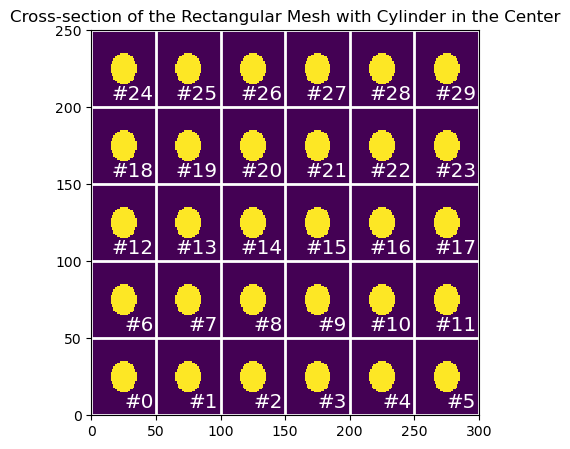

(-25.0, 25.0, -25.0, 25.0)

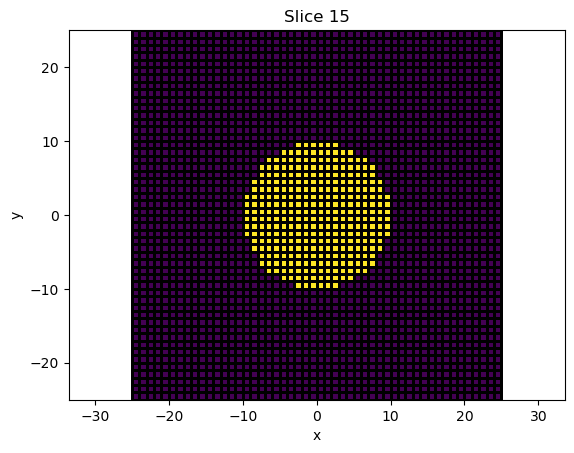

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from discretize import TensorMesh

# Define parameters for the rectangular mesh
nx, ny, nz = 50, 50, 30  # Number of cells in x, y, z directions
hx = np.ones(nx)  # Cell widths in x
hy = np.ones(ny)  # Cell widths in y
hz = np.ones(nz)  # Cell widths in z

# Create the rectangular 3D mesh
mesh = TensorMesh([hx, hy, hz], x0="CCC")

# Define the cylinder parameters
cylinder_radius = 10
cylinder_center = [0, 0, 0]  # Center of the cylinder in the mesh

# Create a model with the cylinder in the middle
model = np.zeros(mesh.nC)  # Initialize the model (e.g., background value zero)

# Mark cells within the cylinder radius as a different value
for i, cell_center in enumerate(mesh.cell_centers):
    x, y, z = cell_center
    # Check if the cell center is within the cylindrical radius
    if np.sqrt((x - cylinder_center[0])**2 + (y - cylinder_center[1])**2) <= cylinder_radius:
        model[i] = 1  # Set cells within the cylinder to 1 (or any other value)


fig, ax = plt.subplots(figsize=(5, 5))
mesh.plot_image(model, normal='Z', ind=int(nz / 2), grid=True, ax=ax)
ax.set_title("Cross-section of the Rectangular Mesh with Cylinder in the Center")
plt.show()

ax = mesh.plot_slice(model, normal='Z', grid=True)
plt.axis('equal')